In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *

In [149]:
class KMeans:
    def __init__(self):
        self.color = ["g","r","b","c", "m", "y"]
    def dataset(self,ave1,ave2,cov1,cov2):
        
        #平均
        mu1 = [ave1,ave1]
        mu2 = [ave2,ave2]
        
        #共分散
        cov = [[cov1,cov2],[cov2,cov1]]
    
        #データの生成
        x1,y1 = np.random.multivariate_normal(mu1,cov,200).T
        x2,y2 = np.random.multivariate_normal(mu2,cov,200).T
        self.X = np.append(x1,x2)
        self.Y = np.append(y1,y2)
        
    def cluster_center(self,x1,y1,x2,y2):
        
        #クラスター中心の初期値
        self.u = [[x1,x2],[y1,y2]]
    
    def figure_plot(self,X,Y,u,clus):
        self.distance(self.X,self.Y,self.u)
        
        # 新しい描画を開始
        plt.figure()
        plt.scatter(self.X,self.Y,c=clus,s=20,marker="o",edgecolors='k')
        plt.scatter(u[0],u[1],c=["r","b"],s=100,marker="x",edgecolors='k')
        
    def param_init(self):
        
        #変数の初期化
        self.r_count = 0
        self.b_count = 0
        self.r_sum = np.array([0.0,0.0])
        self.b_sum = np.array([0.0,0.0])
        self.clus = []
        
    def distance(self,X,Y,u):
        
        self.param_init()
        for i,j in zip(self.X,self.Y):
            a = np.array([i, j])
            b = np.array([u[0][0],u[1][0] ])
            c = np.array([u[0][1],u[1][1]])
            
            #各中心と各データの二乗距離
            red_distance = np.linalg.norm(b - a)
            blue_distance = np.linalg.norm(c - a)
            
            #判定
            if red_distance >= blue_distance:
                self.clus.append("b")
                self.b_count += 1
                self.b_sum += a 
        
            else:
                self.clus.append("r")
                self.r_count += 1
                self.r_sum += a
        
        #中心ベクトルの更新
        t = np.array([self.r_sum/self.r_count,self.b_sum/self.b_count])
        self.u = [[t[0][0],t[1][0]],[t[0][1],t[1][1]]]
        
        print (self.r_count,self.b_count)

204 196
201 199
201 199
201 199
201 199


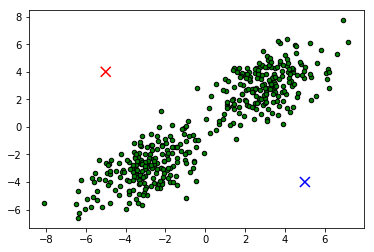

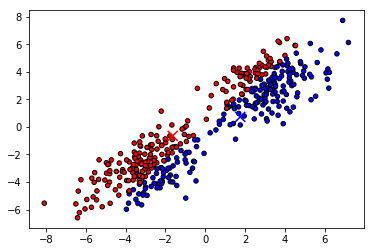

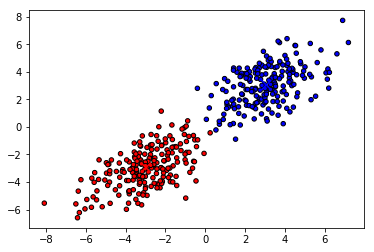

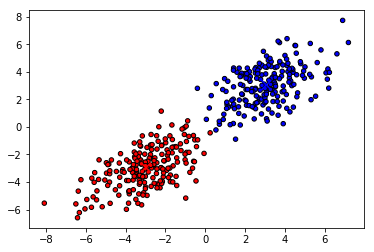

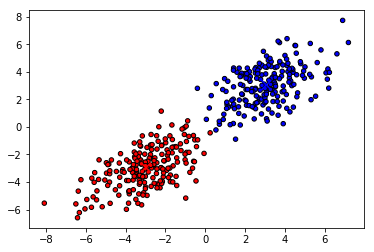

In [150]:
if __name__ == '__main__':
    km = KMeans()
    km.dataset(-3,3,2,1)
    km.cluster_center(-5,4,5,-4)
    km.figure_plot(km.X,km.Y,km.u,km.color[0])
    
    for i in range(4):
        km.figure_plot(km.X,km.Y,km.u,km.clus)

184 216
185 215
191 209
191 209
192 208
193 207
195 205


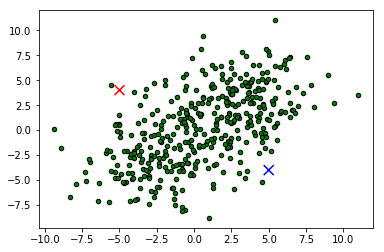

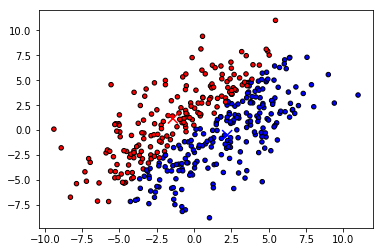

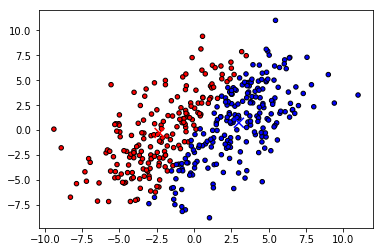

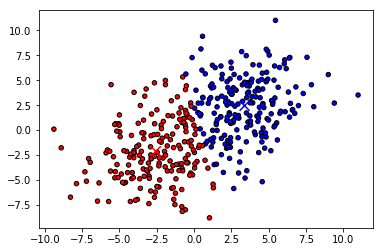

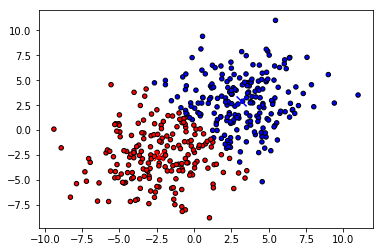

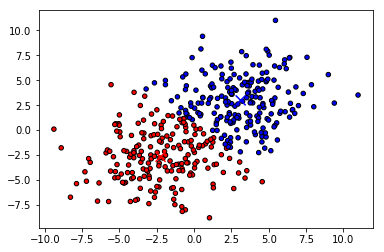

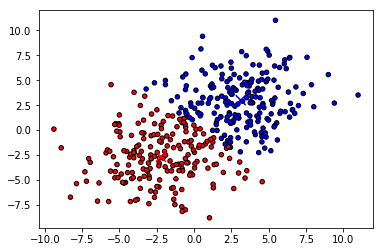

In [155]:
if __name__ == '__main__':
    km = KMeans()
    km.dataset(-2,3,7,1)
    km.cluster_center(-5,4,5,-4)
    km.figure_plot(km.X,km.Y,km.u,km.color[0])
    
    for i in range(6):
        km.figure_plot(km.X,km.Y,km.u,km.clus)

189 211
196 204
203 197
205 195
206 194
207 193
207 193


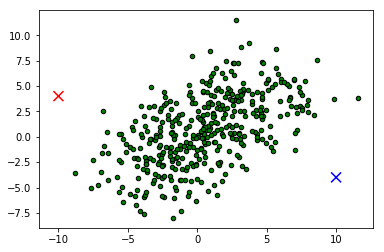

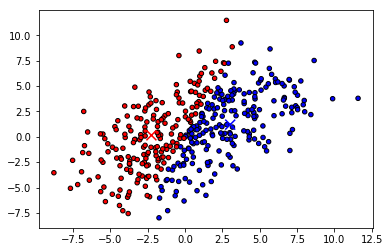

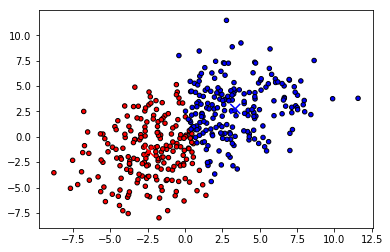

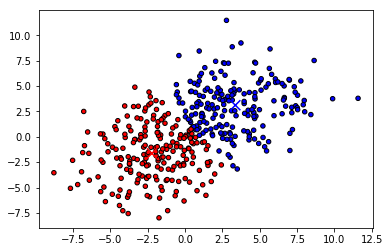

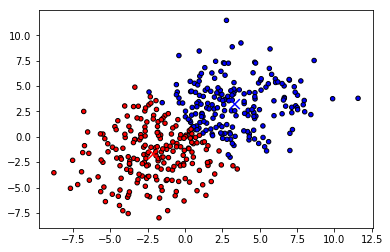

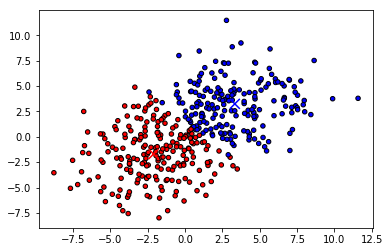

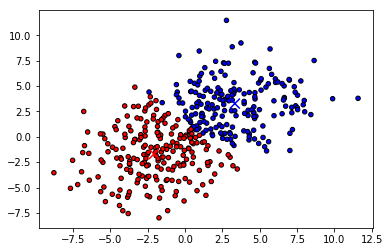

In [156]:
if __name__ == '__main__':
    km = KMeans()
    km.dataset(-2,3,7,1)
    km.cluster_center(-10,4,10,-4)
    km.figure_plot(km.X,km.Y,km.u,km.color[0])
    
    for i in range(6):
        km.figure_plot(km.X,km.Y,km.u,km.clus)